In [7]:
import pandas as pd

# Load relevant .csv files into DataFrames
master_df = pd.read_csv('./Master.csv')
pitching_df = pd.read_csv('./Pitching.csv')
pitchingpost_df = pd.read_csv('./PitchingPost.csv')
batting_df = pd.read_csv('./Batting.csv')

Populating the interactive namespace from numpy and matplotlib


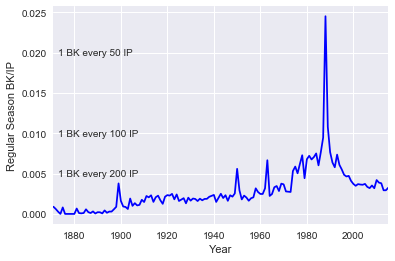

In [31]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

# Balks per inning pitched data grouped by year (regular season)
balks_by_year = pitching_df.groupby('yearID')['BK'].sum()
ip_by_year = (pitching_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP                 
balks_ip_by_year = balks_by_year / ip_by_year

fig = balks_ip_by_year.plot(color='b')
fig.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
fig.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
fig.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))
ylabel('Regular Season BK/IP')
xlabel('Year')

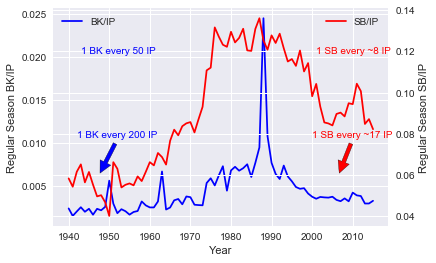

In [51]:
sb_by_year = batting_df.groupby('yearID')['SB'].sum()
cs_by_year = batting_df.groupby('yearID')['CS'].sum()
sb_attempts_by_year = sb_by_year + cs_by_year
sb_attempts_ip_by_year = sb_attempts_by_year / ip_by_year

x = balks_ip_by_year.loc['1940':'2015'].index.get_level_values('yearID')
y1 = balks_ip_by_year.loc['1940':'2015'].values
y2 = sb_attempts_ip_by_year.loc['1940':'2015'].values

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, color='b', label='BK/IP')
ax2.plot(x, y2, color='r', label='SB/IP')

ax1.legend(loc='upper left', shadow=True)                      
ax2.legend(loc='upper right', shadow=True)
ax1.set_xlabel('Year')
ax1.set_ylabel('Regular Season BK/IP')
ax2.set_ylabel('Regular Season SB/IP')
ax2.annotate('1 BK every 50 IP', xy=(1951, .12), xytext=(1943, .1188), color='blue')
ax2.annotate('1 BK every 200 IP', xy=(1947.5, .06), xytext=(1942, .078), color='blue',
             arrowprops=dict(facecolor='blue', shrink=0.05))
ax2.annotate('1 SB every ~8 IP', xy=(2000, .12), xytext=(2001, .1188), color='red')
ax2.annotate('1 SB every ~17 IP', xy=(2006.5, .06), xytext=(2000, .078), color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))

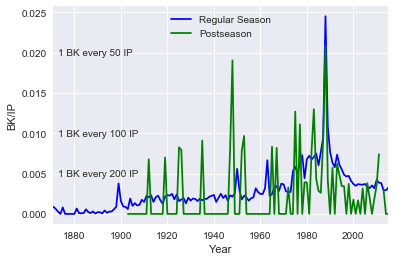

In [53]:
# Balks per inning pitched data grouped by year (postseason)
playoff_balks_by_year = pitchingpost_df.groupby('yearID')['BK'].sum()
playoff_ip_by_year = (pitchingpost_df.groupby('yearID')['IPouts'].sum()) / 3 # Convert to IP
playoff_balks_ip_by_year = playoff_balks_by_year / playoff_ip_by_year

fig = balks_ip_by_year.plot(color='b', label='Regular Season')
fig = playoff_balks_ip_by_year.plot(color='g', label='Postseason')
fig.legend(loc='upper center', shadow=True)
ylabel('BK/IP')
xlabel('Year')
fig.annotate('1 BK every 50 IP', xy=(1873, .02), xytext=(1873, .0197))
fig.annotate('1 BK every 100 IP', xy=(1873, .01), xytext=(1873, .0097))
fig.annotate('1 BK every 200 IP', xy=(1873, .005), xytext=(1873, .0047))

In [73]:
# Balks and innings pitched data grouped by player (regular season)
balks_by_pitcher = pitching_df.groupby('playerID')['BK'].sum()
ip_by_pitcher = (pitching_df.groupby('playerID')['IPouts'].sum()) / 3 # Convert to IP
ip_by_pitcher.rename('IP', inplace=True)

# Innings pitched for every balk column
ip_balks_by_pitcher = ip_by_pitcher / balks_by_pitcher
ip_balks_by_pitcher.rename('IP/BK', inplace=True)

# Combine master and pitching tables
player_info = master_df[['playerID', 'nameFirst', 'nameLast', 'debut', 'finalGame']]
alltime_balk_king = player_info.join(ip_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(balks_by_pitcher, on='playerID', how='inner')
alltime_balk_king = alltime_balk_king.join(ip_balks_by_pitcher, on='playerID', how='inner') \
                                           .sort_values('IP/BK', ascending=True)

# Record holders
alltime_balk_king = alltime_balk_king.loc[alltime_balk_king['IP'] > 50]
modern_balk_king = alltime_balk_king.loc[alltime_balk_king['debut'] > '2000-01-01']
balk_iron_man = alltime_balk_king.loc[(alltime_balk_king['BK'] == 0) & \
                                      (alltime_balk_king['debut'] > '1950-01-01')] \
                                      .sort_values('IP', ascending=False)

In [71]:
alltime_balk_king.head(10)



,playerID,nameFirst,nameLast,debut,finalGame,IP,BK,IP/BK
7298,heinkdo01,Don,Heinkel,1988-04-07,1989-05-18,62.666667,7,8.952381
14706,rowedo01,Don,Rowe,1963-04-09,1963-07-18,54.666667,5,10.933333
10492,manzara01,Ravelo,Manzanillo,1988-09-25,1995-05-09,63.000000,5,12.600000
7227,haywara01,Ray,Hayward,1986-09-20,1988-07-05,78.666667,5,15.733333
6317,gonzage01,German,Gonzalez,1988-08-05,1989-09-25,50.333333,3,16.777778
5519,fortuti01,Tim,Fortugno,1992-07-20,1995-07-26,110.333333,6,18.388889
8357,jimenge01,German,Jimenez,1988-06-28,1988-10-01,55.666667,3,18.555556
8911,kentst01,Steven,Kent,2002-04-04,2002-09-22,57.333333,3,19.111111
10783,mayayu01,Yunesky,Maya,2010-09-07,2013-05-21,59.000000,3,19.666667
17750,waltege01,Gene,Walter,1985-08-09,1988-09-30,182.666667,9,20.296296
